<a href="https://colab.research.google.com/github/NikolayIvTkachenko/Colab_Python_AI_NeuroNetwork/blob/main/NeuronNetwork_01v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Actual value of the digit: 5


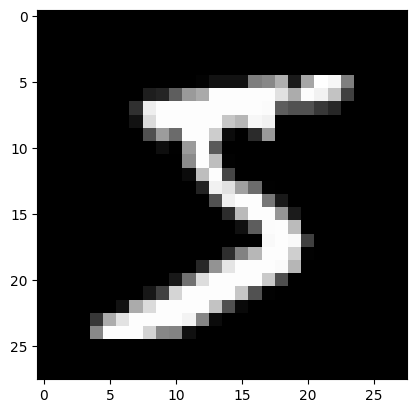

In [4]:
plt.imshow(x_train[0], cmap='gray')
print("Actual value of the digit: {0}".format(y_train[0]))

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
inputs = tf.keras.Input((784,))
hidden_1 = tf.keras.layers.Dense(128, activation='relu')(inputs)
hidden_2 = tf.keras.layers.Dense(128, activation='relu')(hidden_1)
outputs = tf.keras.layers.Dense(10)(hidden_2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Обучение модели
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    steps_per_epoch=200,
    verbose=2,
    validation_steps=50,
    validation_split=0.2
    )

Epoch 1/50
200/200 - 2s - 12ms/step - loss: 0.6233 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.3433 - val_sparse_categorical_accuracy: 0.8831
Epoch 2/50
200/200 - 1s - 5ms/step - loss: 0.3081 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.2635 - val_sparse_categorical_accuracy: 0.9200
Epoch 3/50
200/200 - 1s - 5ms/step - loss: 0.2214 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.2199 - val_sparse_categorical_accuracy: 0.9269
Epoch 4/50
200/200 - 1s - 5ms/step - loss: 0.1867 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.2182 - val_sparse_categorical_accuracy: 0.9331
Epoch 5/50
200/200 - 1s - 5ms/step - loss: 0.1752 - sparse_categorical_accuracy: 0.9456 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9400
Epoch 6/50
200/200 - 1s - 4ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.1771 - val_sparse_categorical_accuracy: 0.9450
Epoch 7/50
200/200 - 1s - 4ms/step - loss: 0.1485 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.187

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 1s - 4ms/step - loss: 0.1082 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.1458 - val_sparse_categorical_accuracy: 0.9519
Epoch 10/50
200/200 - 1s - 7ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0.9645 - val_loss: 0.1380 - val_sparse_categorical_accuracy: 0.9550
Epoch 11/50
200/200 - 1s - 7ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.1463 - val_sparse_categorical_accuracy: 0.9563
Epoch 12/50
200/200 - 1s - 4ms/step - loss: 0.1027 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.1300 - val_sparse_categorical_accuracy: 0.9606
Epoch 13/50
200/200 - 1s - 4ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1515 - val_sparse_categorical_accuracy: 0.9469
Epoch 14/50
200/200 - 1s - 5ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.1164 - val_sparse_categorical_accuracy: 0.9588
Epoch 15/50
200/200 - 1s - 5ms/step - loss: 0.1001 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.1310 - va

In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9697


[0.09496327489614487, 0.9735000133514404]

In [13]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
print(y_test[0])
print(y_pred[0])

7
[ -5.867267   -3.1695101   1.3875093   1.837128  -19.070642   -9.586162
 -20.001907   16.900858   -4.192932   -0.7805538]


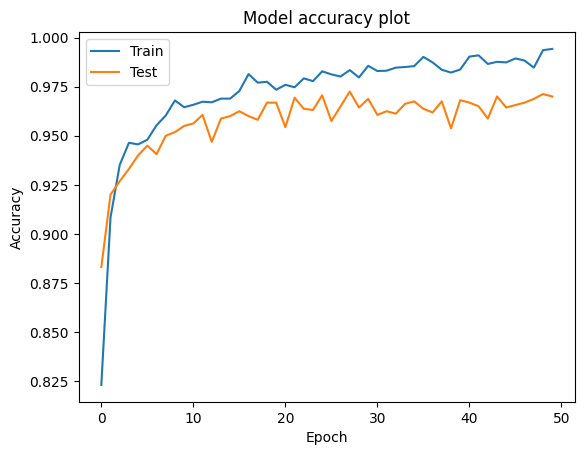

In [15]:
#Построение графика значения потерь и метрик
#график точности модели
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("Model accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

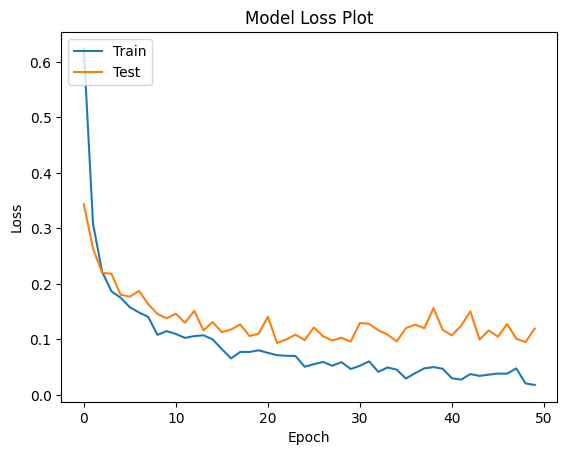

In [16]:
#График потерь модели
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()